# Digit Recognition

In [9]:
# Import Python libraries
import numpy as np
import matplotlib.pyplot as plt
import math

## Logistic Regression Model 


In [3]:
class LogisticRegression:
    """
    Implements a Logistic Regression Classifier.
    """
    
    def __init__(self, input_dim, output_dim, inner):
        """
        Initializes the parameters of the logistic regression classifer to 
        random values.
        
        args:
            input_dim: Number of dimensions of the input data
            output_dim: Number of classes
            hidden_dim: Number of hidden nodes
        """
        
        self.theta01 = np.random.randn(input_dim, inner) / np.sqrt(input_dim)       
        self.bias01 = np.zeros((1, inner))
        
        self.theta12 = np.random.randn(inner, output_dim) / np.sqrt(inner) 
        self.bias12 = np.zeros((1, output_dim))
        
    #--------------------------------------------------------------------------
    
    def compute_cost(self,X, y):
        """
        Computes the total cost on the dataset.
        
        args:
            X: Data array
            y: Labels corresponding to input data
        
        returns:
            cost: average cost per data sample
        """
        num_examples = np.shape(X)[0]
        z = np.dot(X,self.theta1) + self.bias1
        a = np.tanh(z)
        z2 = np.dot(a, self.theta2) + self.bias2
        exp_z2 = np.exp(z2)
        softmax_scores = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)
        
        one_hot_y = np.zeros((num_examples,np.max(y)+1))
        logloss = np.zeros((num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(softmax_scores[i,:]) * one_hot_y[i,:])
        data_loss = np.sum(logloss)
        return 1./num_examples * data_loss

    
    #--------------------------------------------------------------------------
 
    def predict(self,X):
        """
        Makes a prediction based on current model parameters.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        z01 = np.dot(X,self.theta01) + self.bias01
        X1 = np.tanh(z01)
        z12 = np.dot(X1, self.theta12) + self.bias12
        exp_z = np.exp(z12)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        predictions = np.argmax(softmax_scores, axis = 1)
        return predictions
        
    #--------------------------------------------------------------------------
   
    def fit(self,X,y,num_epochs,alpha=0.01):     
        
        for epoch in range(0, num_epochs):

            # Forward propagation
            z01 = np.dot(X, self.theta01) + self.bias01
            X1 = np.tanh(z01)
            z12 = np.dot(X1, self.theta12) + self.bias12
            exp_z = np.exp(z12)
            softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)          
                                                                       
                                                                                            
            # Backpropagation
            beta2 = np.zeros_like(softmax_scores)
            one_hot_y2 = np.zeros_like(softmax_scores)
            for i in range(X.shape[0]):
                one_hot_y2[i, y[i]] = 1
            beta2 = softmax_scores - one_hot_y2
                                       
            
            
            # Compute gradients of model parameters
            dtheta2 = np.dot(X1.T, beta2)
            dbias2 = np.sum(beta2, axis = 0, keepdims=True)
            
            delta2 = np.dot(beta2, self.theta12.T) * (1 - X1*X1)
            dtheta1 = np.dot(X.T, delta2)                                   
            dbias1 = np.sum(delta2, axis = 0)
        
            # Gradient descent parameter update
            self.theta01 -= alpha * dtheta1
            self.bias01  -= alpha * dbias1
            self.theta12 -= alpha * dtheta2
            self.bias12  -= alpha * dbias2
        return 0


## Initialization

In [4]:
#1. Load data
X_train = np.genfromtxt('DATA/Digit_X_train.csv', delimiter=',')
y_train = np.genfromtxt('DATA/Digit_y_train.csv', delimiter=',').astype(np.int64)
X_test = np.genfromtxt('DATA/Digit_X_test.csv', delimiter=',')
y_test = np.genfromtxt('DATA/Digit_y_test.csv', delimiter=',').astype(np.int64)

In [85]:
#2. Initialize model
input_dim = np.shape(X_train)[1]
output_dim = np.max(y_train) + 1
logreg = LogisticRegression(input_dim, output_dim, 40)

## Train digit recognition model

In [86]:
#4. Train the model
logreg.fit(X_train,y_train,1000,alpha=0.001)

0

## Choose learning rate

In [94]:
# step decay to find optimal learning rate 
def step_decay(epoch):
   initial_lrate = 0.001
   drop = 0.5
   epochs_drop = 10.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   return lrate

In [95]:
lrAdaptive = LogisticRegression(input_dim,output_dim,inner=40)
accs = []
lrs = []
for i in range(50):
    lr = step_decay(i)
    lrAdaptive.fit(X_train,y_train,500,lr)
    acc = 0
    y_pred = lrAdaptive.predict(X_test)
    con_mat = np.zeros((output_dim, output_dim))
    for i in range(len(y_pred)):
        con_mat[y_pred[i], y_test[i]] += 1
        if y_test[i] == y_pred[i]:
            acc += 1
    acc = acc/len(y_pred)
    lrs.append(lr)
    accs.append(acc)

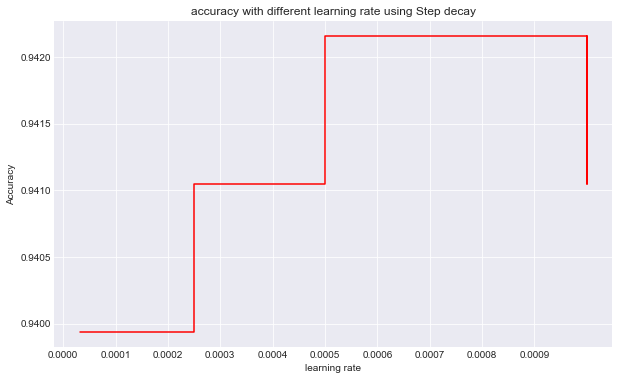

In [96]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,6))
plt.title('accuracy with different learning rate using Step decay')
plt.xlabel('learning rate')
plt.ylabel('Accuracy')
x_ticks = np.arange(0,0.001,0.0001)
plt.xticks(x_ticks)
plt.plot(lrs,accs,'r')
plt.show()

## Model Evaluation

In [87]:
#5. compute accuracy and confusion matrix
acc = 0
y_pred = logreg.predict(X_test)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y_test[i]] += 1
    if y_test[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.9488320355951056
CONFUSION MATRIX: 
 [[86.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 82.  0.  0.  1.  0.  1.  0.  4.  0.]
 [ 0.  0. 85.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  1. 80.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0. 86.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  4.  0. 88.  0.  1.  2.  2.]
 [ 1.  0.  0.  0.  2.  1. 90.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0. 86.  0.  1.]
 [ 0.  2.  0.  6.  0.  0.  0.  0. 82.  0.]
 [ 0.  6.  0.  0.  3.  2.  0.  2.  0. 88.]]
